# Importing, Generating and Overfitting

In [1]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,56 mins 12 secs
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_a_nogue_sanchez_09o9sx
H2O cluster total nodes:,1
H2O cluster free memory:,3.405 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [3]:
x = [z*0.01 for z in range (0,1001)]

In [4]:
print(x[0:5])
print(x[995:1001])

[0.0, 0.01, 0.02, 0.03, 0.04]
[9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0]


In [5]:
y = np.sin(x)
y = y + np.random.normal(0, 0.1, len(x))

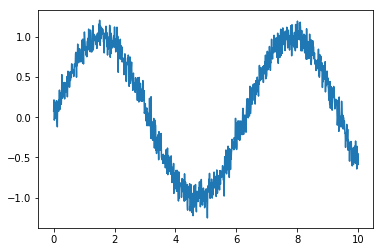

In [6]:
plt.plot(x, y)
plt.show()

In [7]:
sine_wave = pd.DataFrame({
    'a':x,
    'b':y
})

In [8]:
sine_wave_h2o = h2o.H2OFrame(sine_wave)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
sine_wave_h2o.summary()

,a,b
type,real,real
mins,0.0,-1.25374651619761
mean,4.999999999999934,0.1819152110029474
maxs,10.0,1.2078773770300022
sigma,2.891081112663593,0.6796118743631937
zeros,1,0
missing,0,0
0,0.0,0.07446632054440389
1,0.01,0.2157504815492758
2,0.02,-0.036079864560255706


In [10]:
# When going to h2o, we won't see the name sine_wave_h2o. To do so, we need
sine_wave_h2o = h2o.H2OFrame(
    sine_wave,
    destination_frame = 'sine_wave')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
# To come back to a pandas data frame
sine_wave_h2o.as_data_frame()

,a,b
0,0.00,0.074466
1,0.01,0.215750
2,0.02,-0.036080
3,0.03,-0.021005
4,0.04,0.071205
5,0.05,0.077356
6,0.06,0.180295
7,0.07,0.022141
8,0.08,-0.014236
9,0.09,0.205380


In [29]:
import random

h2o.init()

#generating a random data set
random.seed(123)
SampleSize = 1000

bloodTypes= ['A','AB','B','O','A','B','AB','O','A','O'];
bloodTypeList=[]
for i in range (SampleSize):
    bloodTypeList.append(bloodTypes[random.randrange(0, 10, 1)])
print(bloodTypeList)
    
    
    
ageList = []
for i in range (SampleSize):
    ageList.append(random.randrange(18, 66, 1))
    
print (ageList)

healthyEating= []

for i in range (SampleSize):
    healthyEating.append(random.randrange(0, 10,1))
print (healthyEating)

activeLivestyle = []
for i in range (SampleSize):
    activVar = round(np.random.normal(loc=5, scale=2, size=None),0)
    if(ageList[i] <30):
        activVar += 1
    activeLivestyle.append(activVar)
print (activeLivestyle)
    
incomeList = []
for i in range (SampleSize):
    incomeVar = 2000 + (ageList[i] *3)^2
    incomeVar +=(healthyEating[i]*500)
    incomeVar -=(activeLivestyle[i]*300)
    
    # ADD Random noise
    incomeVar += random.randrange(0, 5001,1)
    incomeVar = round(incomeVar,-2)
#    activVar = round(np.random.normal(loc=5, scale=2, size=None),0)
#    if(ageList[i] <30):
#        activVar += 1
    incomeList.append(incomeVar)
print (incomeList)

 
 
peopleDF = pd.DataFrame(list(zip(bloodTypeList, ageList, healthyEating,activeLivestyle,incomeList)))

peopleDF.columns =['Btype','Age','HealthyEating','ActiveLifestyle','Income']

print(peopleDF.head())  
print(peopleDF)
print(peopleDF.describe())

hf = h2o.H2OFrame(peopleDF, destination_frame = "people")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 hour 16 mins
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_a_nogue_sanchez_09o9sx
H2O cluster total nodes:,1
H2O cluster free memory:,3.403 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


['O', 'AB', 'O', 'A', 'AB', 'B', 'A', 'O', 'O', 'B', 'O', 'A', 'B', 'A', 'A', 'B', 'A', 'O', 'A', 'A', 'O', 'O', 'A', 'O', 'B', 'A', 'B', 'B', 'B', 'O', 'A', 'O', 'O', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'AB', 'A', 'A', 'B', 'O', 'B', 'O', 'O', 'B', 'A', 'AB', 'AB', 'O', 'AB', 'AB', 'AB', 'A', 'B', 'A', 'A', 'AB', 'A', 'B', 'A', 'O', 'A', 'A', 'AB', 'A', 'B', 'B', 'B', 'AB', 'A', 'O', 'B', 'A', 'B', 'O', 'O', 'A', 'O', 'A', 'A', 'AB', 'A', 'A', 'B', 'A', 'O', 'B', 'A', 'O', 'O', 'A', 'A', 'O', 'O', 'B', 'B', 'A', 'A', 'AB', 'AB', 'A', 'A', 'AB', 'O', 'AB', 'A', 'O', 'O', 'O', 'AB', 'O', 'A', 'B', 'AB', 'A', 'B', 'AB', 'A', 'A', 'AB', 'A', 'O', 'B', 'AB', 'AB', 'O', 'O', 'A', 'O', 'AB', 'A', 'O', 'O', 'B', 'AB', 'A', 'O', 'B', 'B', 'O', 'B', 'O', 'B', 'A', 'O', 'AB', 'A', 'AB', 'B', 'O', 'A', 'O', 'A', 'O', 'AB', 'AB', 'O', 'AB', 'A', 'A', 'AB', 'B', 'O', 'A', 'O', 'A', 'O', 'B', 'B', 'B', 'A', 'A', 'A', 'AB', 'O', 'O', 'AB', 'O', 'B', 'AB', 'AB', 'AB', 'B', 'O', 'O', 'O', 'A', 'A', 'O',

[7.0, 5.0, 4.0, 1.0, 3.0, 3.0, 10.0, 3.0, 6.0, 5.0, 11.0, 7.0, 6.0, 6.0, 7.0, 6.0, 4.0, 3.0, 7.0, 4.0, 6.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 2.0, 1.0, 4.0, 2.0, 4.0, 7.0, 5.0, 3.0, 4.0, 4.0, 5.0, 5.0, 7.0, 5.0, 3.0, 8.0, 9.0, 2.0, 5.0, 2.0, 3.0, 7.0, 4.0, 2.0, 5.0, 3.0, 3.0, 5.0, 3.0, 9.0, 5.0, 8.0, 5.0, 5.0, 7.0, 6.0, 6.0, 4.0, 4.0, 9.0, 2.0, 8.0, 5.0, 9.0, 4.0, 4.0, 5.0, -0.0, 4.0, 4.0, 8.0, 3.0, 6.0, 3.0, 6.0, 8.0, 3.0, 5.0, 9.0, 6.0, 4.0, 4.0, 3.0, 5.0, 3.0, 5.0, 2.0, 4.0, 3.0, 7.0, 9.0, 7.0, 4.0, 9.0, 3.0, 6.0, 5.0, 8.0, 6.0, 3.0, 1.0, 1.0, 4.0, 4.0, 0.0, 3.0, 4.0, 8.0, 5.0, 3.0, 4.0, 4.0, 3.0, 7.0, 8.0, 8.0, 8.0, 5.0, 6.0, 7.0, 8.0, 10.0, 4.0, 9.0, 5.0, 7.0, 4.0, 5.0, 8.0, 7.0, 7.0, 6.0, 4.0, 8.0, 4.0, 5.0, 5.0, 7.0, 4.0, 4.0, 7.0, 8.0, 1.0, 8.0, 6.0, 8.0, 6.0, 2.0, 4.0, 6.0, 6.0, 5.0, 3.0, 6.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 8.0, 3.0, 7.0, 3.0, 6.0, 7.0, 3.0, 8.0, 5.0, 5.0, 3.0, 3.0, 4.0, 3.0, 7.0, 2.0, 3.0, 5.0, 5.0, 5.0, 9.0, 4.0, 5.0, 8.0, 3.0, 5.0, 7.0, 5.0,

4    AB   32              4              3.0  5100.0
    Btype  Age  HealthyEating  ActiveLifestyle   Income
0       O   54              3              7.0   4600.0
1      AB   59              8              5.0   7300.0
2       O   43              5              4.0   3400.0
3       A   49              4              1.0   6500.0
4      AB   32              4              3.0   5100.0
5       B   63              7              3.0   4900.0
6       A   63              8             10.0   5000.0
7       O   38              3              3.0   6500.0
8       O   64              2              6.0   5800.0
9       B   47              0              5.0   3000.0
10      O   26              6             11.0   6400.0
11      A   27              4              7.0   6100.0
12      B   64              4              6.0   6400.0
13      A   46              7              6.0   6400.0
14      A   57              8              7.0   7900.0
15      B   48              7              6.0   82

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ANOGUE~1.SAN\\AppData\\Local\\Temp\\tmp7i1lc_ro.csv'

In [30]:
hf.head()

Btype,Age,HealthyEating,ActiveLifestyle,Income
O,54,3,7,4600
AB,59,8,5,7300
O,43,5,4,3400
A,49,4,1,6500
AB,32,4,3,5100
B,63,7,3,4900
A,63,8,10,5000
O,38,3,3,6500
O,64,2,6,5800
B,47,0,5,3000


# Split data into train, test and validation sets
We will be using validation tests because we usually train our models such that we maximize the accuracy in the test set. By doing so, we are overfitting our model to the test set. To solve it, we could use an additional partition of the data: the validation set.
However, an alternative to the validation set is Coss Validation, as we will be taking random partitions of the data and hence taking several tests sets in our analysis.

In [31]:
# Import the data from the server
people = h2o.get_frame("people")

In [32]:
train, valid, test = people.split_frame(
    ratios = [0.8, 0.1],
    destination_frames = ["people_train", "people_valid", "people_test"],
    seed = 123
    )

In [33]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

788/118/94


# A GBM on the artificial data

In [34]:
train = h2o.get_frame("people_train")
valid = h2o.get_frame("people_valid")
test = h2o.get_frame("people_test")

In [35]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [36]:
y = 'Income'
ignoreFields = [y, "id"]
x = [i for i in train.names if i not in ignoreFields]
print(x)

['Btype', 'Age', 'HealthyEating', 'ActiveLifestyle']


In [37]:
ml = H2OGradientBoostingEstimator(model_id = "defaults")
ml.train(x, y, train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [38]:
ml.mae(train=True)

996.6777320513265

In [40]:
ml.mae(valid=True)
# And on the test set
perf = ml.model_performance(test)
perf.mae()

1315.786854524846

Deliberately overfitting our model (specifying ntrees to 1000 and a max depth of 10)

In [41]:
m2 = H2OGradientBoostingEstimator(model_id = "overfit",
                                 ntrees = 1000,
                                 max_depth = 10)
m2.train(x, y, train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
print("Train: %d --> %d" % (ml.mae(train=True), m2.mae(train=True)))
print("Valid: %d --> %d" % (ml.mae(valid=True), m2.mae(valid=True)))
print("Test: %d --> %d" % (perf.mae(), m2.model_performance(test).mae()))

Train: 996 --> 275
Valid: 1213 --> 1397
Test: 1315 --> 1513


We can clearly see that with 1000 trees and a max depth of 10, we are overfitting. The estimation error goes up in the test and validation set.

# Cross Validation

In [47]:
# We need to re-split the data as we'll be no more using a validation set
train, test = people.split_frame(
    ratios = [0.897],
    destination_frames = ["people_train", "people_test"],
    seed = 123)

In [55]:
m3 = H2OGradientBoostingEstimator(model_id = "def9folds", nfolds = 9)
m3.train(x, y, train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
m3.mae(train=True)

999.1829014756944

In [51]:
m3.mae(xval=True)

1274.763231970931

In [53]:
perf = m3.model_performance(test)
perf.mae()

1276.102243428479